## Oil Prices Analysis using Facebook Prophet

In [1]:
#importing necessary libraries 

import pandas as pd
import numpy as np 
from fbprophet import Prophet
from matplotlib import pyplot as plt

In [25]:
#uploading files in Google Colab

from google.colab import files
uploaded = files.upload()

Saving WTIData.xlsx to WTIData.xlsx


In [26]:
#dataframe
import io
df = pd.read_excel('WTIData.xlsx')

In [27]:
#in fbprophet ds and y are assigned to be mandatory 
df.columns = ['ds','y']

In [28]:
#setting up the date format as needed
df['ds'] = pd.to_datetime(df['ds'])

In [29]:
df.head()

,ds,y
0,1986-01-15,22.93
1,1986-02-15,15.46
2,1986-03-15,12.61
3,1986-04-15,12.84
4,1986-05-15,15.38


In [30]:
#checking for null values
df.isna().sum()

ds    0
y     0
dtype: int64

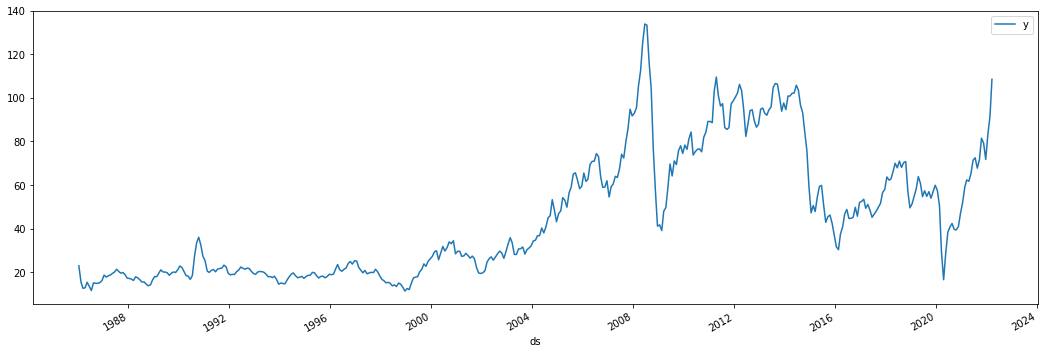

In [40]:
#data plot
df.plot(x='ds',y='y',figsize=(18,6))

In [57]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
future = m.make_future_dataframe(periods=12,freq = 'ms')

In [59]:
forecast = m.predict(future)

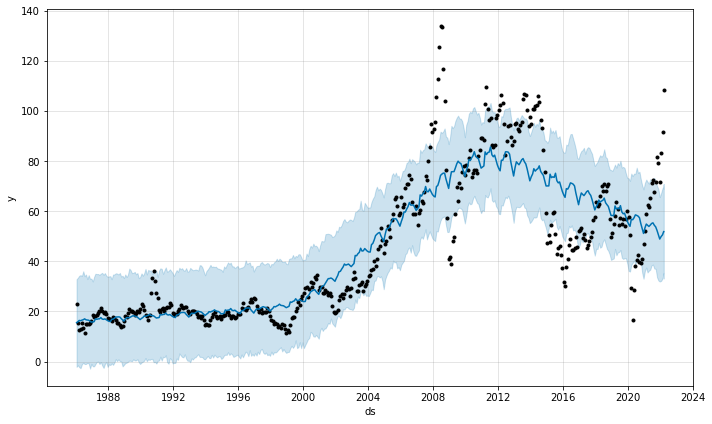

In [60]:
m.plot(forecast);

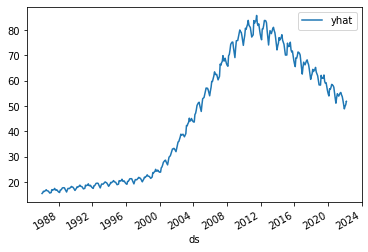

In [61]:
forecast.plot(x='ds',y='yhat')

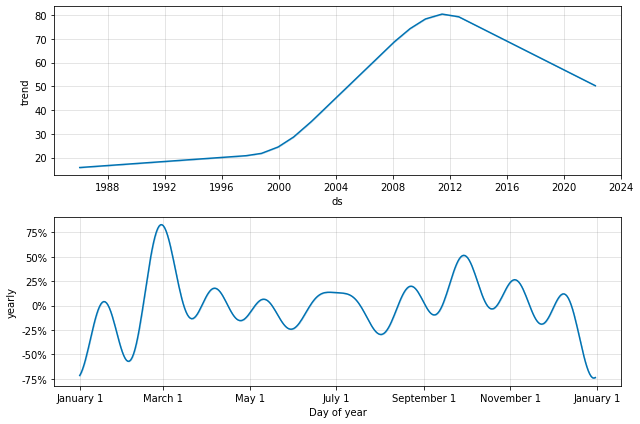

In [62]:
m.plot_components(forecast);

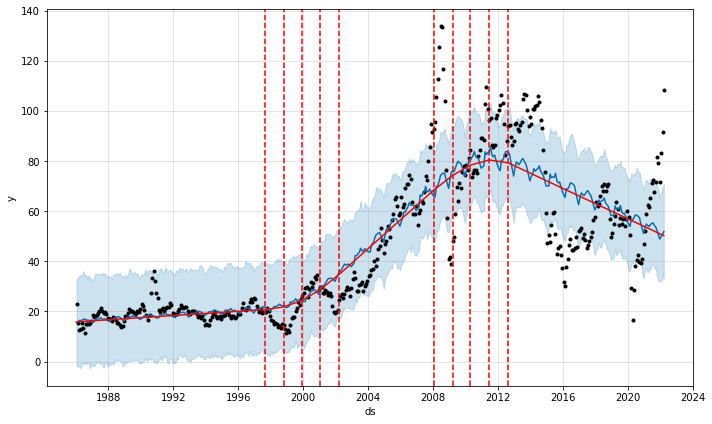

In [63]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [41]:
len(df)

435

In [42]:
len(df)-12

423

In [64]:
train = df.iloc[:423]
test = df.iloc[423:]

In [65]:
test.tail()

,ds,y
430,2021-11-15,79.15
431,2021-12-15,71.71
432,2022-01-15,83.22
433,2022-02-15,91.64
434,2022-03-15,108.50


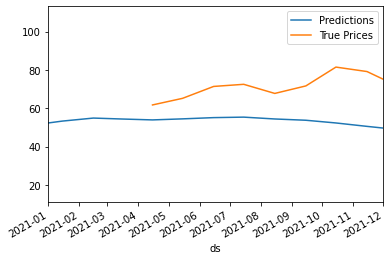

In [66]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True)

test.plot(x='ds',y='y',label='True Prices',legend=True,ax=ax,xlim=('2021-01-01','2021-12-01'))

The model is not perfoming well in the end because there are a lof of uncertanities involved. Since 2013 the prices were declining due to various geopolitical factors and shift towards a greener economy. However, in 2022 the prices are going up due to conflits in Europe. 